In [1]:
from evalutils import *
from rotationforest import *
import sklearn.model_selection
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
seed = 0

In [4]:
X, y = get_dataset(54)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state = np.random.RandomState(seed))

Read in data frame. Size is 846 x 19.
Shape of the data after expansion: (846, 18)


In [12]:
p = np.sqrt(X_train.shape[1])
rf1 = RandomForest(n_trees = 0, enable_lda_projections = False, enable_pca_projections = False, light_weight_split_point = True, granularity = 10, p = p, rs = np.random.RandomState(seed))
rf2 = RandomForest(n_trees = 0, enforce_projections = True, enable_lda_projections = True, enable_pca_projections = False, lda_on_canonical_projection = True, light_weight_split_point = True, granularity = 10, p = p, rs = np.random.RandomState(seed))
rf3 = RandomForest(n_trees = 0, enforce_projections = True, enable_lda_projections = False, enable_pca_projections = True, light_weight_split_point = True, pca_classes = 0,  granularity = 10, p = p, rs = np.random.RandomState(seed))
for rf in [rf1, rf2, rf3]:
    rf.train(X_train, y_train)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [13]:
lcs_valid = []
lcs_test = []

In [14]:
def extend_learning_curves(lcs_valid, lcs_test):
    scores_valid = []
    scores_test = []
    for rf in [rf1, rf2, rf3]:
        rf.step()
        scores_valid.append(rf.get_oob_error())
        scores_test.append(sklearn.metrics.accuracy_score(y_test, rf.predict(X_test)))
    lcs_valid.append(scores_valid)
    lcs_test.append(scores_test)

In [17]:
for i in tqdm(range(100)):
    extend_learning_curves(lcs_valid, lcs_test)

  0%|          | 0/100 [00:00<?, ?it/s]

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


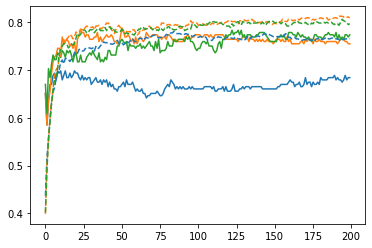

In [18]:
fig, ax = plt.subplots()
for i, col in enumerate(np.array(lcs_test).T):
    ax.plot(col, color=f"C{i}")
for i, col in enumerate(np.array(lcs_valid).T):
    ax.plot(col, color=f"C{i}", linestyle="--")
plt.show()

In [9]:
get_results_of_mixed_trees(1468, 1, 5)

Read in data frame. Size is 1080 x 857.
Shape of the data after expansion: (1080, 856)


 40%|████      | 2/5 [00:05<00:08,  2.74s/it]

Observed error in LDA, ignoring this dimension
No dataset, falling back to standard.
Observed error in LDA, ignoring this dimension
No dataset, falling back to standard.
Observed error in LDA, ignoring this dimension
No dataset, falling back to standard.


 80%|████████  | 4/5 [00:10<00:02,  2.74s/it]

Observed error in LDA, ignoring this dimension
No dataset, falling back to standard.
Observed error in LDA, ignoring this dimension
No dataset, falling back to standard.


  0%|          | 0/5 [00:00<?, ?it/s]

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_va

 20%|██        | 1/5 [00:08<00:35,  8.84s/it]/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
 40%|████      | 2/5 [00:19<00:29,  9.91s/it]/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divi

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
 80%|████████  | 4/5 [00:49<00:13, 13.09s/it]/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:470: RuntimeWarning: invalid value encountered in true_divi

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'get_all_combos_for_sum' is not defined

In [ ]:
def get_results_of_mixed_trees(openmlid, seed):
    
    # load and split data
    X, y = get_dataset(openmlid)
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state = np.random.RandomState(seed))

    # create random forests
    rf1 = RandomForest(n_trees = 0, enable_lda_projections = False, enable_pca_projections = False, light_weight_split_point = True, granularity = 10, rs = np.random.RandomState(seed))
    rf2 = RandomForest(n_trees = 0, enforce_projections = True, enable_lda_projections = True, enable_pca_projections = False, lda_on_canonical_projection = True, light_weight_split_point = False, rs = np.random.RandomState(seed))
    rf3 = RandomForest(n_trees = 0, enforce_projections = True, enable_lda_projections = False, enable_pca_projections = True, pca_classes = 0, light_weight_split_point = False, rs = np.random.RandomState(seed))
    for rf in [rf1, rf2, rf3]:
        rf.setup(X_train, y_train)
        
    # create scores
    scores = {}
    
    # iterate over number of trees
    for n_trees in range(1, 11):
        for rf in [rf1, rf2, rf3]:
            rf.step()
        scores[n_trees] = get_scores_of_trained_trees([rf1, rf2, rf3], n_trees, X_test, y_test)
    return scores
    

def get_mixted_rf(rfs, nums):
    rf = RandomForest()
    rf.setup(rfs[0].X, rfs[0].y)
    for rf_orig, num in zip(rfs, nums):
        rf.indices_per_tree.extend(rf_orig.indices_per_tree[:num])
        rf.trees.extend(rf_orig.trees[:num])
    return rf

def get_all_combos_for_sum(s):
    combos = []
    for c1 in range(s + 1):
        for c2 in range(s + 1 - c1):
            c3 = s - c1 - c2
            combos.append((c1, c2, c3))
    return combos
    
get_results_of_mixed_trees(61, 1)

In [12]:
import json
import pandas as pd

In [ ]:
from matplotlib import cm

In [ ]:
%matplotlib notebook
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = np.array(points)
scores_normalized = np.array(scores)
scores_normalized = (scores_normalized - min(scores_normalized)) / (max(scores_normalized) - min (scores_normalized))
ax.scatter(p[:,0], p[:,1], p[:,2], color=cm.get_cmap("Reds")(scores_normalized), cmap="Reds")

ax.set_xlabel("num standard trees")
ax.set_ylabel("num lda trees")
ax.set_zlabel("num pca trees")

plt.show()


In [ ]:
max(scores)

In [ ]:
rf1.get_oob_error()